In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.isna().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [10]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati / 2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long / 2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371  # Earth's radius in kilometers
    return c

In [11]:
df['Distance'] = distance_transform(
df['pickup_longitude'],
df['pickup_latitude'],
df['dropoff_longitude'],
df['dropoff_latitude']
)

In [12]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


Text(0, 0.5, 'Fare Amount')

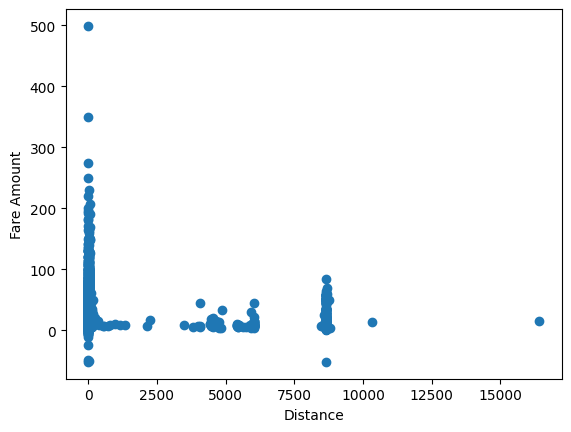

In [13]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare Amount")


In [14]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True)
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True)

Text(0, 0.5, 'Fare Amount')

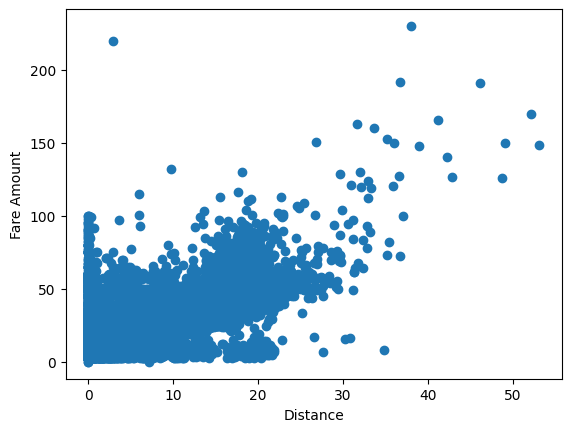

In [15]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare Amount")

In [16]:
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.125637,0.005885,-0.006253,0.005501,-0.006142,0.011693,0.857729
pickup_datetime,0.125637,1.000000,0.005589,-0.007984,0.005561,-0.008064,0.006460,0.030578
pickup_longitude,0.005885,0.005589,1.000000,-0.973204,0.999992,-0.981941,-0.000649,-0.117044
pickup_latitude,-0.006253,-0.007984,-0.973204,1.000000,-0.973206,0.991076,-0.001190,0.110843
dropoff_longitude,0.005501,0.005561,0.999992,-0.973206,1.000000,-0.981942,-0.000650,-0.117282
dropoff_latitude,-0.006142,-0.008064,-0.981941,0.991076,-0.981942,1.000000,-0.001035,0.109486
passenger_count,0.011693,0.006460,-0.000649,-0.001190,-0.000650,-0.001035,1.000000,0.007784
Distance,0.857729,0.030578,-0.117044,0.110843,-0.117282,0.109486,0.007784,1.000000


In [17]:
q_low = df["fare_amount"].quantile(0.01)
q_hi = df["fare_amount"].quantile(0.99)
df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

Text(0, 0.5, 'Fare Amount')

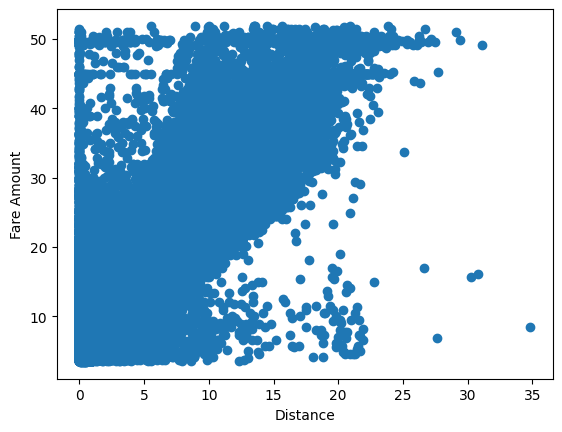

In [18]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare Amount")

In [19]:
X = df['Distance'].values.reshape(-1, 1)
y = df['fare_amount'].values.reshape(-1, 1)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

std = StandardScaler()
y_std = std.fit_transform(y)
x_std = std.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.25)  # Define the test_size parameter here

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))


Training set score: 0.74
Test set score: 0.7349123


In [21]:
y_pred = l_reg.predict(X_test)
result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred
result.sample(10)

,Actual,Predicted
16983,-0.761910,-0.461052
44810,-0.402950,-0.258862
14947,-0.864470,-0.800673
31309,-0.454230,-0.158352
4629,0.917509,-0.051628
13907,-0.813190,-0.640409
24990,-0.300390,-0.465250
38861,1.750809,2.718147
46490,-0.108090,0.174620
38056,1.173909,0.137660


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

In [23]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [24]:
y_pred_RF = rf_reg.predict(X_test)
result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF
result.sample(10)

,Actual,Predicted
7254,-0.813190,-0.514099
23127,-0.300390,-0.356413
4512,-0.864470,-0.819087
9191,-0.710630,-0.042557
40635,0.981609,0.897766
24130,-0.236290,-0.772935
14448,0.879049,0.898279
15298,0.404709,0.016264
7844,-0.043990,-0.049182
20036,0.622649,0.609701


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', metrics.r2_score(y_test, y_pred_RF))


Mean Absolute Error: 0.3011696369819583
Mean Absolute % Error: 1.4270291007475093
Mean Squared Error: 0.3183020961826548
Root Mean Squared Error: 0.5641826797967612
R Squared (R²): 0.6826910866446451
